# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results)

#Updating to the prefered column order based on the example outputs 
prefered_order = [
    "Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"
]
# _dfr refers to df = dataframe. r = re-order 
combined_data_dfr = combined_data[prefered_order]

# Display the data table for preview
combined_data_dfr.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [71]:
# Checking the number of mice.
number_mice = combined_data_dfr["Mouse ID"].nunique()
number_mice

249

In [72]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_data_dfr[combined_data_dfr.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique

duplicate_mice_ids

<bound method Series.unique of 908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object>

In [73]:
# Checking duplicate_mice_ids is a list object 
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()

# Get all the data for the duplicate mouse ID
duplicate_mouse = combined_data_dfr[combined_data_dfr['Mouse ID'].isin(duplicate_mice_ids)]

# Reseting the index 
duplicate_mouse = duplicate_mouse.reset_index(drop=True)

# Display the data
duplicate_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0,45.000000,0,Propriva,Female,21,26
1,g989,0,45.000000,0,Propriva,Female,21,26
2,g989,5,48.786801,0,Propriva,Female,21,26
3,g989,5,47.570392,0,Propriva,Female,21,26
4,g989,10,51.745156,0,Propriva,Female,21,26
5,g989,10,49.880528,0,Propriva,Female,21,26
6,g989,15,51.325852,1,Propriva,Female,21,26
7,g989,15,53.442020,0,Propriva,Female,21,26
8,g989,20,55.326122,1,Propriva,Female,21,26
9,g989,20,54.657650,1,Propriva,Female,21,26


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_dfr[~combined_data_dfr["Mouse ID"].isin(duplicate_mice_ids)]

#Resets the index of the new clean_df data frame it looks cleaner 
clean_df = clean_df.reset_index(drop=True)

clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [75]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = clean_df["Mouse ID"].nunique()

number_mice_clean

248

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
statistics_summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
})

statistics_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [77]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
statistics_summary_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg( 
    mean="mean", 
    median="median", 
    var="var", 
    std="std", 
    sem="sem"
)

statistics_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

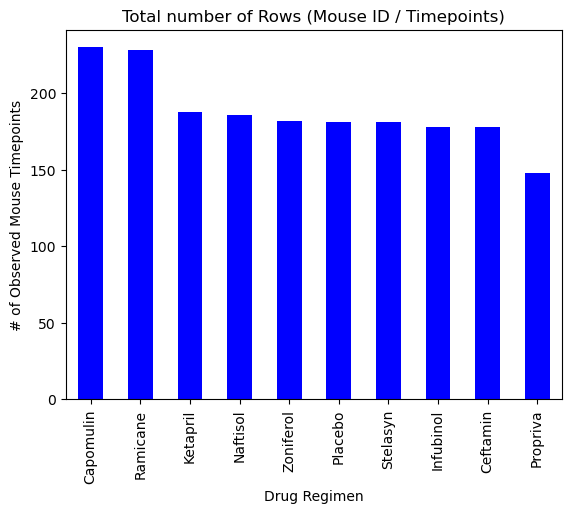

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df["Drug Regimen"].value_counts()

#Creates and formats a bar plot 
regimen_counts.plot(
    kind="bar",
    title="Total number of Rows (Mouse ID / Timepoints)",
    xlabel="Drug Regimen", 
    ylabel="# of Observed Mouse Timepoints",
    color="blue"
)

plt.show()

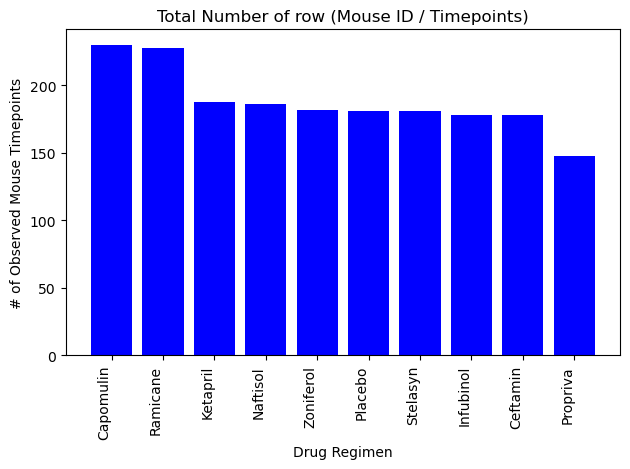

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_df["Drug Regimen"].value_counts()

#Formats and Creates a bar plot 
plt.bar(regimen_counts.index, regimen_counts.values, color="blue")
plt.title("Total Number of row (Mouse ID / Timepoints)")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()

# Adjsuting x-axis 
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

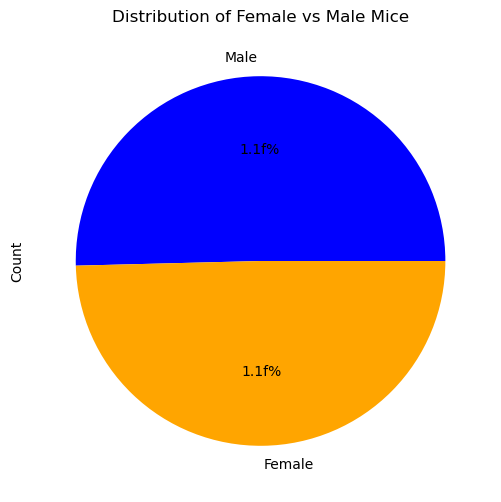

In [80]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_df[["Mouse ID", "Sex"]].drop_duplicates()["Sex"].value_counts()

# Get the unique mice with their gender
unique_mice_gender.plot(
    kind="pie",
    title = "Distribution of Female vs Male Mice",
    autopct="1.1f%%", 
    figsize=(6, 6), 
    ylabel="Count", 
    colors=["blue", "orange"]
)

# Make the pie chart
plt.show

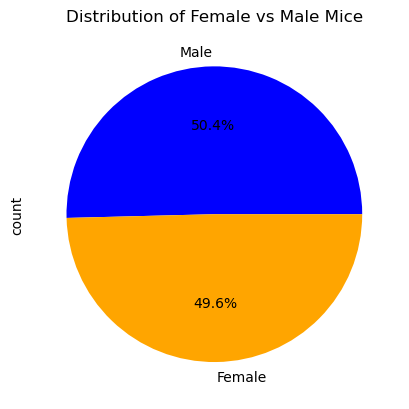

In [81]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_df[["Mouse ID", "Sex"]].drop_duplicates()["Sex"].value_counts()

# Get the unique mice with their gender
plt.pie(
    unique_mice_gender,
    labels=unique_mice_gender.index,

    autopct="%1.1f%%",
    colors=["blue", "orange"] 
)

#Format the pie chart ylabel and title 
plt.ylabel("count")
plt.title("Distribution of Female vs Male Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint, clean_df, on=["Mouse ID", "Timepoint"])

#Filtered based on on the selected treatment regimens, and keep only rows where the "Drug Regimen" matches the selected regimens 
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"].isin(treatment_regimens)]

final_tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [83]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# for loop to iterate over each treatment regime 
for treatment in treatments_list:

    ## Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_df.loc[final_tumor_volume_df ["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    #Add the tumor value data to the tumor volume list
    tumor_vol_data.append(tumor_volumes)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    #Print the results for the treatment 
    print(f"{treatment}'s potential outliers: {outliers}")
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/3n/t0775bfj4931hr98hy7197340000gn/T/ipykernel_1244/2646250121.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


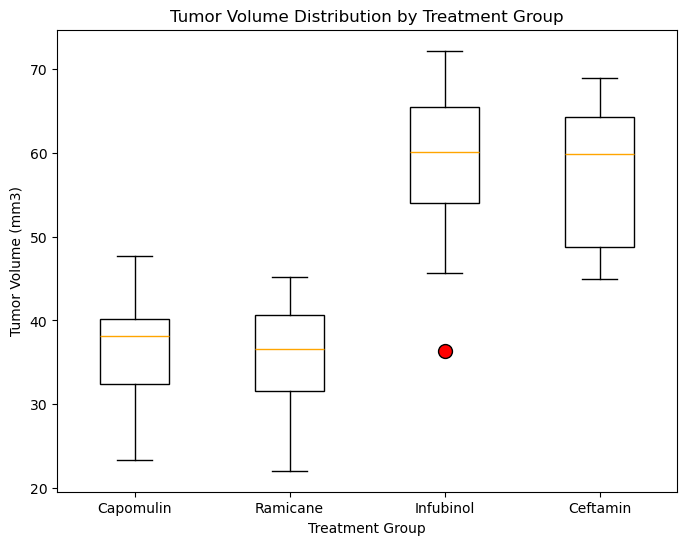

In [84]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    tumor_vol_data,
    labels=treatments_list,
    patch_artist=True,
    flierprops=dict(marker='o', markerfacecolor="red", markeredgecolor="black", markersize=10),
    boxprops=dict(facecolor="black"),
    medianprops=dict(color="orange"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)

for patch in box['boxes']: 
    patch.set(facecolor='white')

# Format to add titles and labels
plt.title("Tumor Volume Distribution by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

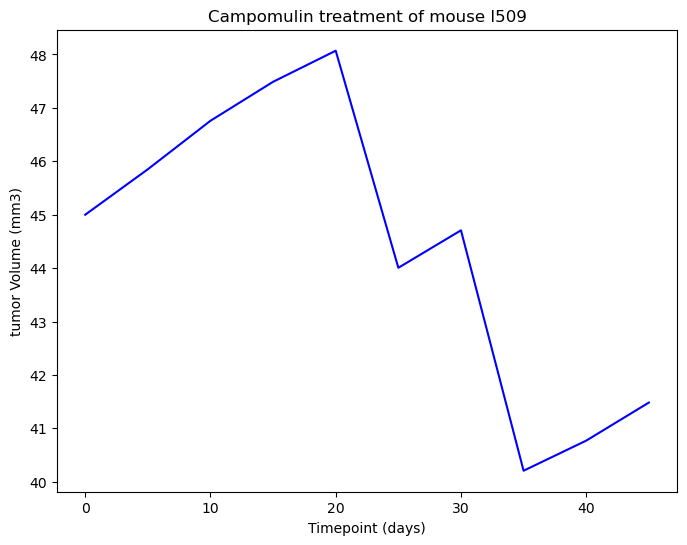

In [85]:
## Below commented out is code that I developed if the mouse ID was not provided in the line graph image, and one needed to be selected

# # Filters the dataset to include only Capomulin-treated mice
# capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# # Select the specific mouse ID randomly and first o the list 
# capomulin_mouse = capomulin_data["Mouse ID"].unique()[0]  # Choose the first mouse from the list of unique IDs

# # Show which mouse ID was selected, for part 2 of the code
# print(f"Selected Mouse ID: {capomulin_mouse}")


# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Selects a single mouse treated with Capomulin (based on the ID shown in the graph image)
capomulin_mouse = "l509"

#Filters the data for that selected mouse
mouse_data = clean_df.loc[clean_df["Mouse ID"] == capomulin_mouse]

#Generates the line plot 
plt.figure(figsize=(8, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color='blue', label=f"Mouse {capomulin_mouse}")

#Format to add titles and labels 
plt.title("Campomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("tumor Volume (mm3)")

plt.show()

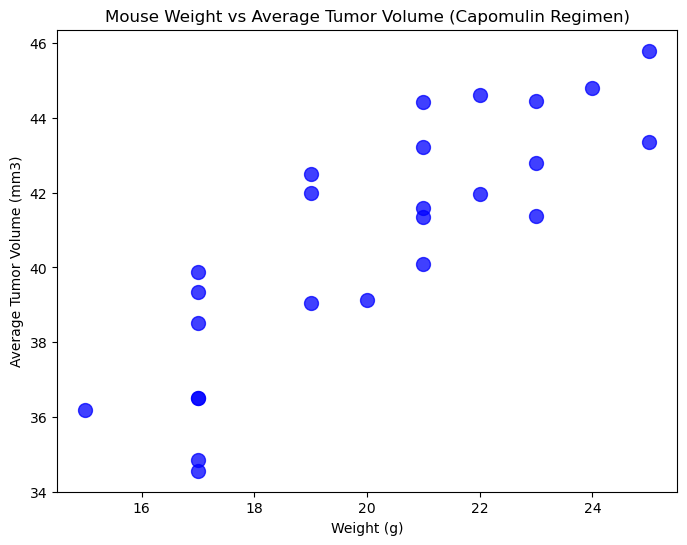

In [86]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filters the data for the Capomulin drug regimen
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Calculates the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Retrieve the mouse weights
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, average_tumor_volume, color="blue", edgecolors="blue", alpha=0.75, s=100, marker='o')

# Format and add titles and axis labels
plt.title("Mouse Weight vs Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


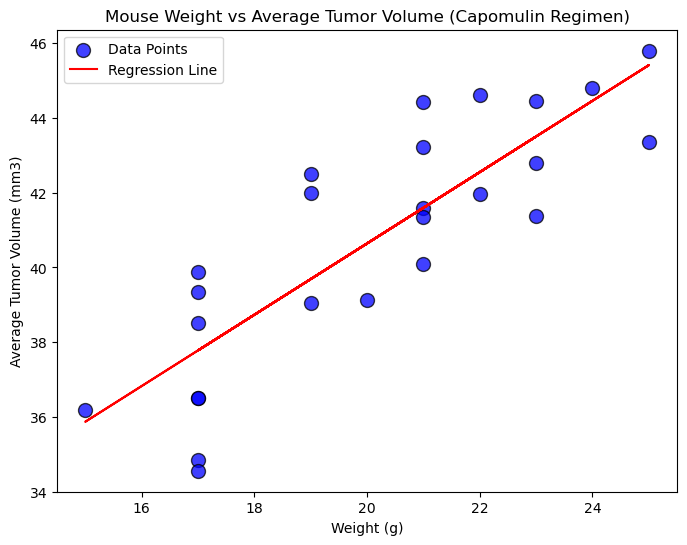

In [87]:
# Generates a scatter plot and linear regression model for mouse weight vs average observed tumor volume
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation = mouse_weights.corr(average_tumor_volume)
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation:.2f}")

# Performs the linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weights, average_tumor_volume)

# Generates the regression line
regression_line = slope * mouse_weights + intercept

# Generates the scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, average_tumor_volume, color="blue", edgecolor="black", alpha=0.75, s=100, marker='o', label="Data Points")
plt.plot(mouse_weights, regression_line, color="red", label="Regression Line")

# Formats titles, axis labels, and legend 
plt.title("Mouse Weight vs Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()

plt.show()

